# Regresión Polinomial COVID-19 Ecuador
Realizado por: Tatiana Cárdenas Jho

In [225]:
#Problema:
#Generar un modelo de regresión de los casos confirmados de COVID dentro del Ecuador el mismo que permitirá predecir el comportamiento y/o predicción de la pandemia 

#Importación de librerías
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures 
import matplotlib.pyplot as plt
print('Importadas')

Importadas


In [226]:
#Carga de datos

#Variables
#dataset = pd.read_csv('dataset.csv')
#print(dataset.head())

df=pd.read_csv('dataset.csv') 
print(df.shape)
df.sample(5)

(407, 59)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
367,ECU,South America,Ecuador,2021-03-03,289472,2747,1527.571,15921.0,71.0,41.000,...,10581.936,3.6,140.448,5.55,2,12.3,80.635,1.5,77.01,0.759
52,ECU,South America,Ecuador,2020-04-22,10850,452,427.429,537.0,17.0,21.286,...,10581.936,3.6,140.448,5.55,2,12.3,80.635,1.5,77.01,0.759
240,ECU,South America,Ecuador,2020-10-27,163192,1014,1296.714,12588.0,15.0,26.286,...,10581.936,3.6,140.448,5.55,2,12.3,80.635,1.5,77.01,0.759
362,ECU,South America,Ecuador,2021-02-26,282599,1430,1617.571,15713.0,44.0,34.143,...,10581.936,3.6,140.448,5.55,2,12.3,80.635,1.5,77.01,0.759
71,ECU,South America,Ecuador,2020-05-11,29509,-50,-338.857,2145.0,18.0,82.286,...,10581.936,3.6,140.448,5.55,2,12.3,80.635,1.5,77.01,0.759


In [227]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ECU,South America,Ecuador,2020-03-01,6,6,NaN,NaN,NaN,NaN,...,10581.936,3.6,140.448,5.55,2,12.3,80.635,1.5,77.01,0.759
1,ECU,South America,Ecuador,2020-03-02,6,0,NaN,NaN,NaN,NaN,...,10581.936,3.6,140.448,5.55,2,12.3,80.635,1.5,77.01,0.759
2,ECU,South America,Ecuador,2020-03-03,7,1,NaN,NaN,NaN,NaN,...,10581.936,3.6,140.448,5.55,2,12.3,80.635,1.5,77.01,0.759
3,ECU,South America,Ecuador,2020-03-04,10,3,NaN,NaN,NaN,NaN,...,10581.936,3.6,140.448,5.55,2,12.3,80.635,1.5,77.01,0.759
4,ECU,South America,Ecuador,2020-03-05,13,3,NaN,NaN,NaN,NaN,...,10581.936,3.6,140.448,5.55,2,12.3,80.635,1.5,77.01,0.759


In [228]:
df.describe().round(3)

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,407.000,407.000,402.000,394.000,394.000,402.000,407.000,407.000,402.000,394.000,...,407.000,407.0,407.000,407.00,407.0,407.0,407.000,407.0,407.00,407.000
mean,137704.005,852.130,849.336,9215.898,43.891,42.604,7804.996,48.298,48.140,522.353,...,10581.936,3.6,140.448,5.55,2.0,12.3,80.635,1.5,77.01,0.759
std,100545.657,967.507,468.354,5646.413,196.902,75.717,5698.879,54.838,26.546,320.036,...,0.000,0.0,0.000,0.00,0.0,0.0,0.000,0.0,0.00,0.000
min,6.000,-7953.000,-525.000,2.000,0.000,0.000,0.340,-450.772,-29.757,0.113,...,10581.936,3.6,140.448,5.55,2.0,12.3,80.635,1.5,77.01,0.759
25%,44440.000,353.000,562.572,4172.750,12.000,21.179,2518.837,20.008,31.886,236.510,...,10581.936,3.6,140.448,5.55,2.0,12.3,80.635,1.5,77.01,0.759
50%,126419.000,765.000,869.143,11276.000,27.000,31.143,7165.367,43.360,49.262,639.118,...,10581.936,3.6,140.448,5.55,2.0,12.3,80.635,1.5,77.01,0.759
75%,212012.000,1202.000,1123.750,14059.000,43.000,39.964,12016.736,68.128,63.694,796.857,...,10581.936,3.6,140.448,5.55,2.0,12.3,80.635,1.5,77.01,0.759
max,346817.000,11536.000,2038.429,17293.000,3852.000,597.000,19657.418,653.855,115.537,980.159,...,10581.936,3.6,140.448,5.55,2.0,12.3,80.635,1.5,77.01,0.759


In [229]:
df.keys()

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [230]:
#Analizamos el tipo de dato que tiene el dataset en caso de que tengamos que convertir algún valor
df.dtypes

iso_code                                  object
continent                                 object
location                                  object
date                                      object
total_cases                                int64
new_cases                                  int64
new_cases_smoothed                       float64
total_deaths                             float64
new_deaths                               float64
new_deaths_smoothed                      float64
total_cases_per_million                  float64
new_cases_per_million                    float64
new_cases_smoothed_per_million           float64
total_deaths_per_million                 float64
new_deaths_per_million                   float64
new_deaths_smoothed_per_million          float64
reproduction_rate                        float64
icu_patients                             float64
icu_patients_per_million                 float64
hosp_patients                            float64
hosp_patients_per_mi

In [231]:
# Expresar las fechas en numero de dias desde el 01 Enero del 2020
FMT = '%Y-%m-%d'
date = df['date']
df['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)

In [232]:
df=df[['date','total_cases']]
df

,date,total_cases
0,60,6
1,61,6
2,62,7
3,63,10
4,64,13
...,...,...
402,462,339604
403,463,341619
404,464,342678
405,465,344877


In [241]:
#Variables
X = list(df.iloc [:, 0]) # Fecha
y = list(df.iloc [:, 1]) # Numero de casos

In [242]:
#Entrenamiento
pf = PolynomialFeatures(degree = 8)
X_p = pf.fit_transform(np.array(X).reshape(-1, 1))
regresion_lineal = linear_model.LinearRegression()
regresion_lineal.fit(X_p, y)

LinearRegression()

Pruebas:

In [267]:
#Prediccion de x dias desde la fecha inicial del Dataset 2020-03-01=dia 60
pol_prediccion = regresion_lineal.predict(pf.fit_transform([[700]]))
print("Prediccion para el dia 700 despues del dia 60:")
print(int(pol_prediccion))

Prediccion para el dia 700 despues del dia 60:
5806171


Grafica:

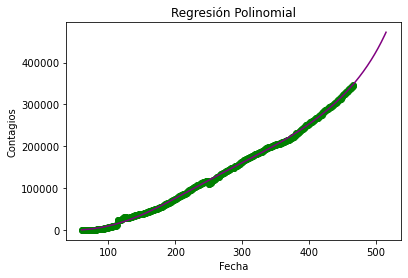

In [266]:
#Graficar
#fig = plt.figure(figsize=(6,6))
plt.title('Regresión Polinomial')
plt.scatter(X, y, color='green')
x = np.array(range(min(X), max(X)+50))
plt.plot(x_real, regresion_lineal.predict(pf.fit_transform(x.reshape(-1, 1))), color='purple')
plt.xlabel('Fecha')
plt.ylabel('Contagios')
plt.show()